In [ ]:
# Segment each frame from a time series using Cellpose

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from cellpose import core, utils, io, models, metrics
from PIL import Image
import os

In [2]:
# Load time series data
# This function returns a 4D array [a,b,c,d], where a is the number of images, b is the number of frames per image, c*d are the dimensions of each frame
def load_time_series(directory):
    images = []
    filenames = sorted(os.listdir(directory)) # Ensure correct order
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff')):
            img_path = os.path.join(directory, filename)
            img = io.imread(img_path) # or Image.open(img_path) for PIL
            images.append(img)
    return np.array(images)

image_dir = '/Users/wanyanli/Documents/Harvard - Sharpe Lab/Experiments/Live Cell Imaging/2025-02-05 Live Cell Imaging/xy5_split_images'
time_series_data = load_time_series(image_dir)

In [9]:
# Initialize Cellpose model
model = models.Cellpose(gpu=False, model_type='cyto3')

In [11]:
# Segment each frame
# masks should have same dimensions as time series data
masks = np.empty(time_series_data.shape)
for i in range(time_series_data.shape[0]):
    fov = time_series_data[i]
    for j in range(fov.shape[0]):
        frame = fov[j]
        seg_result = model.eval(frame, diameter=None, channels=[0,0])[0]
        masks[i,j] = seg_result    

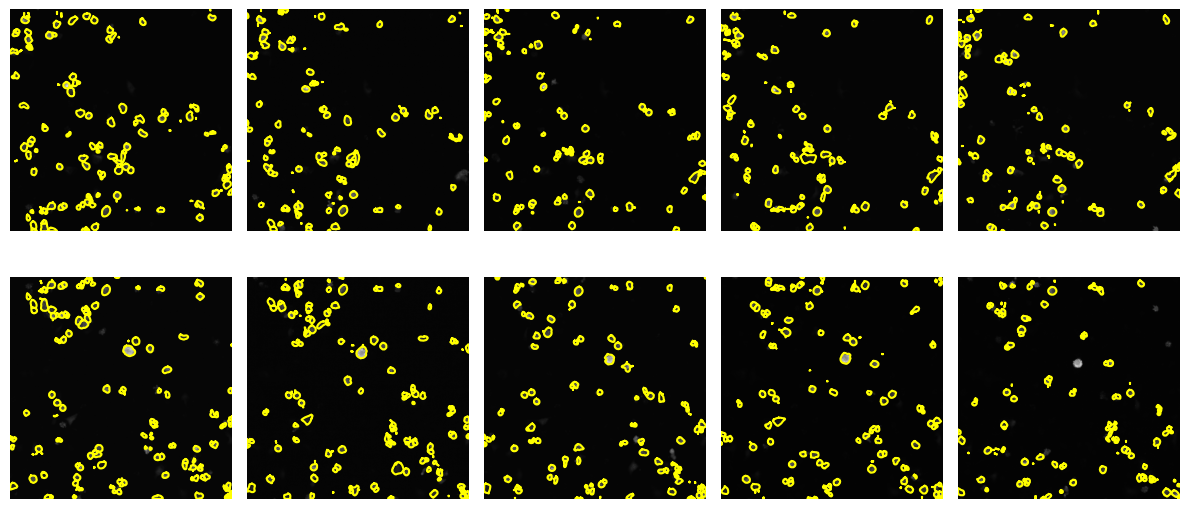

In [13]:
# Plot results
plt.figure(figsize=(12,6))
for i in range(masks.shape[0]):
    for j, mask in enumerate(masks[i]):
        img = time_series_data[i,j].squeeze()
        plt.subplot(2,5,1+5*i+j) # subplot(M, N, 1+N*i+j), where M is the number of fields of view, N is the number of frames
        plt.imshow(img, cmap="gray")
        outlines = utils.outlines_list(mask)
        for o in outlines:
            plt.plot(o[:,0], o[:,1], color=[1,1,0])
        plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Save masks
output_dir = '/Users/wanyanli/Documents/Harvard - Sharpe Lab/Experiments/Live Cell Imaging/2025-02-05 Live Cell Imaging/xy5_split_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for i, mask in enumerate(masks):
    io.imsave(os.path.join(output_dir, f'mask_frame_{i+1}.tif'), mask)